In [21]:
#Importing Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Downloading contents of the web page
url = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"
r = requests.get(url)
#r.status_code
soup = BeautifulSoup(r.content)
soup


<!DOCTYPE HTML>
<html lang="en"><head><meta charset="utf-8"/><title>Inflation rates in Nigeria</title><link href="https://js.worlddata.info" rel="preconnect"/><link href="https://js.worlddata.info" rel="dns-prefetch"/><link href="https://cdn.worlddata.info" rel="preconnect"/><link href="https://cdn.worlddata.info" rel="dns-prefetch"/><link href="https://www.laenderdaten.info/Afrika/Nigeria/inflationsraten.php" hreflang="de" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" hreflang="en" rel="alternate"/><link href="https://www.datosmundial.com/africa/nigeria/inflacion.php" hreflang="es" rel="alternate"/><link href="https://www.dadosmundiais.com/africa/nigeria/inflacao.php" hreflang="pt-BR" rel="alternate"/><link href="https://www.donneesmondiales.com/afrique/nigeria/inflation.php" hreflang="fr" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" id="canonical" rel="canonical"/><meta content="Development o

In [23]:
td = "table data"
tr = "table rows"
th = "table head"

In [24]:
list_row = []
for header in soup.find_all("th"):
  list_row.append(header.text)

df = pd.DataFrame(columns= list_row)
df

,Year,Nigeria,Ø EU,Ø USA,Ø World


In [25]:
tr_ = soup.find_all("tr")
list_of_rows = []
for table_row in range(1,len(tr_)):
    list_for_each_row = [] 
    tr_mini = tr_[table_row]
    for row in tr_mini:
        list_for_each_row.append(row.text)
    list_of_rows.append(list_for_each_row)

for i in list_of_rows:
    print(i)
    df.loc[len(df)] = i

df

['2021', '16.95 %', '2.55 %', '4.70 %', '3.42 %']
['2020', '13.25 %', '0.50 %', '1.23 %', '1.92 %']
['2019', '11.40 %', '1.63 %', '1.81 %', '2.19 %']
['2018', '12.09 %', '1.74 %', '2.44 %', '2.44 %']
['2017', '16.52 %', '1.43 %', '2.13 %', '2.19 %']
['2016', '15.68 %', '0.18 %', '1.26 %', '1.55 %']
['2015', '9.01 %', '-0.06 %', '0.12 %', '1.43 %']
['2014', '8.06 %', '0.20 %', '1.62 %', '2.35 %']
['2013', '8.48 %', '1.22 %', '1.46 %', '2.62 %']
['2012', '12.22 %', '2.66 %', '2.07 %', '3.73 %']
['2011', '10.84 %', '3.29 %', '3.16 %', '4.82 %']
['2010', '13.72 %', '1.53 %', '1.64 %', '3.35 %']
['2009', '12.55 %', '0.84 %', '-0.36 %', '2.94 %']
['2008', '11.58 %', '4.16 %', '3.84 %', '8.95 %']
['2007', '5.39 %', '2.51 %', '2.85 %', '4.82 %']
['2006', '8.23 %', '2.67 %', '3.23 %', '4.28 %']
['2005', '17.86 %', '2.49 %', '3.39 %', '4.11 %']
['2004', '15.00 %', '2.29 %', '2.68 %', '3.38 %']
['2003', '14.03 %', '2.09 %', '2.27 %', '3.03 %']
['2002', '12.88 %', '2.42 %', '1.59 %', '2.83 %']
['2

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,n/a
58,1963,-2.69 %,2.92 %,1.24 %,n/a
59,1962,5.27 %,3.55 %,1.20 %,n/a
60,1961,6.28 %,2.08 %,1.07 %,n/a


In [26]:
df.head(3)

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %


In [27]:
inflation_df = df
inflation_df.to_csv("naija_inflation_rates.csv", index=False)

#load csv File containing clean data into Python Environment Using Pandas.read_csv().
inflation_df = pd.read_csv("naija_inflation_rates.csv")
inflation_df.head(5)

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %


# Data Cleaning Process

>Check properly labelling of columns\
>Check the columns data type\
>Check for missing values,work on it by either to drop them or fill them up\
>Check for rows with duplicates and drop them\
>Check for the structure of the data set

In [28]:
#Check Proper Labelling of columns
inflation_df.columns #improper labelling and whitespaces

Index(['Year', 'Nigeria', 'Ø EU', 'Ø USA', 'Ø World'], dtype='object')

In [29]:
#Rename the columns.
inflation_df.rename(columns={'Ø EU': 'EU'}, inplace=True)
inflation_df.rename(columns={'Ø USA': 'USA'}, inplace=True)
inflation_df.rename(columns={'Ø World': 'World'}, inplace=True)

inflation_df.head()
     


,Year,Nigeria,EU,USA,World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %


In [30]:
#Check columns datatype
inflation_df.dtypes

Year        int64
Nigeria    object
EU         object
USA        object
World      object
dtype: object

In [31]:
#Check for missing values,work on it by either to drop them or fill them up
inflation_df.isna().sum()# there are no missing values

Year        0
Nigeria     0
EU          0
USA         0
World      20
dtype: int64

In [32]:
#check for rows with duplicates
inflation_df.dropna(inplace=True)
inflation_df[inflation_df.duplicated()]#No duplicates

,Year,Nigeria,EU,USA,World


In [33]:
#Removing symbols from dataframe
inflation_df["EU"]= inflation_df["EU"].str.replace("%", "")
inflation_df["Nigeria"]= inflation_df["Nigeria"].str.replace("%", "")
inflation_df["USA"]= inflation_df["USA"].str.replace("%", "")
inflation_df["World"]= inflation_df["World"].str.replace("%", "")
     

In [34]:
#Changing the columns with object datatype to float datatype to make it neater and a definite approximation
inflation_df["EU"]= inflation_df["EU"].astype(float)
inflation_df["Nigeria"]= inflation_df["Nigeria"].astype(float)
inflation_df["USA"]= inflation_df["USA"].astype(float)
inflation_df["World"]= inflation_df["World"].astype(float)
     

In [35]:
inflation_df.dtypes

Year         int64
Nigeria    float64
EU         float64
USA        float64
World      float64
dtype: object

In [36]:
inflation_rates = inflation_df
inflation_rates.to_csv("Inflation_Rates.csv", index=False)

#load csv File containing clean data into Python Environment Using Pandas.read_csv().
inflation_rates = pd.read_csv("Inflation_Rates.csv")
inflation_df.head(5)


,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.42
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.09,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19


## Exploratory Data Analysis

>The Year Nigeria had a significant hike in the inflation rate ?\
>In what year did w experience a decrease in inflation rate?\
>what country shows a consistency in inflation rate?\
>How does Nigeria compare to other countries\
>Which country had the highest average inflation?\
>Which country had the lowest average inflation?\
>How does historical inflation compare to recent inflation rates?

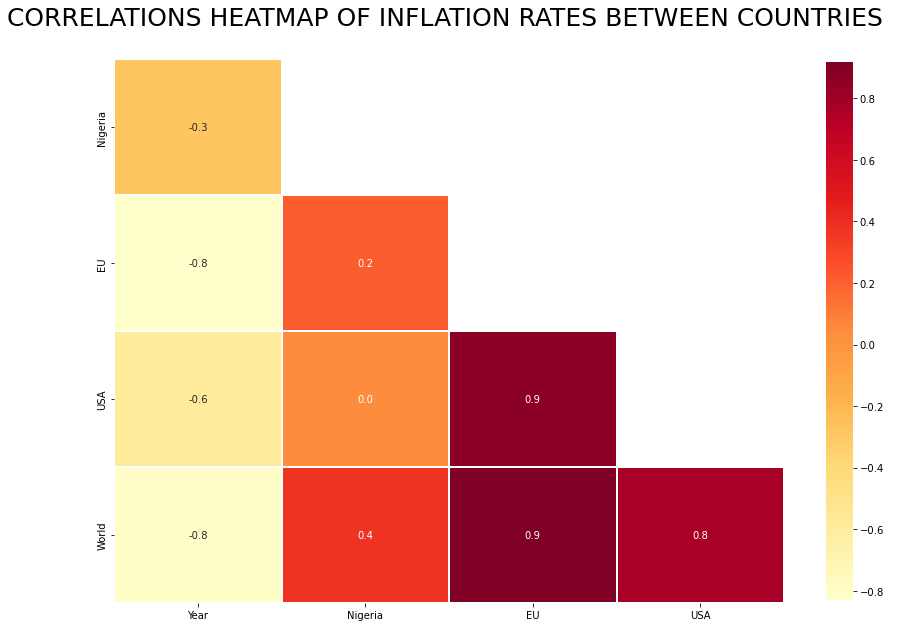

In [37]:
#Plot and customize a correlations heatmap for inflation_df.
corr=inflation_df.corr()
# use numpy function to mask the data to create a matrix of booleans
ones = np.ones_like(corr, dtype='bool') # by default returns ones for all the data

# use another numpy function to get just the upper triangle of the boolean array
mask = np.triu(ones)

# adjust mask and correlations 
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# generate customized heatmap of correlations
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True,fmt=".1f",cmap='YlOrRd', linewidths=.10, cbar_kws={'shrink':.99})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap of Inflation rates between countries \n".upper(), fontdict={'fontsize': 25}, loc='center')
plt.show()


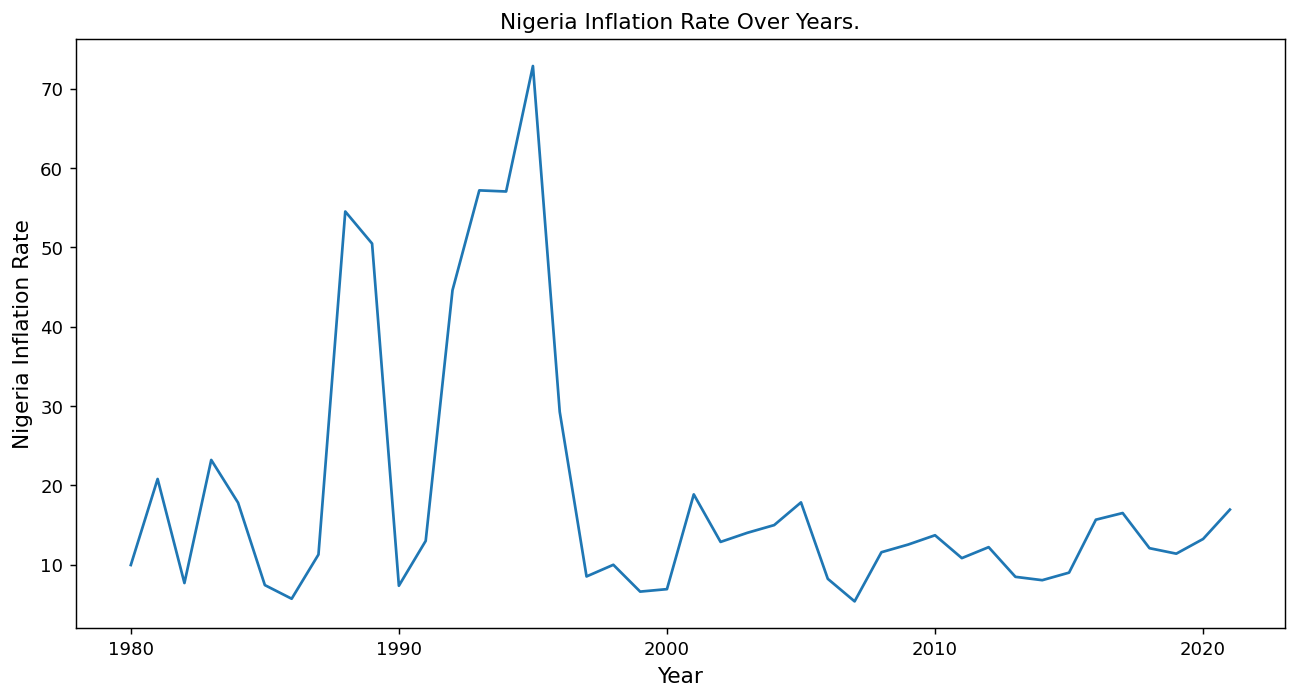

In [38]:
high_inflation = inflation_df.groupby('Year')['Nigeria'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Year', fontsize = 12)
#on y-axis
plt.ylabel('Nigeria Inflation Rate', fontsize = 12)
#title of the line plot
plt.title('Nigeria Inflation Rate Over Years.')

#plotting the graph
plt.plot(high_inflation)

#displaying the line plot
plt.show()

In [39]:
#To find that which year made the highest inflation rate
high_inflation.idxmax()

1995

>We can conclude both graphically as well as by calculations that year 1995 was the highest inflation rate Nigeria had.

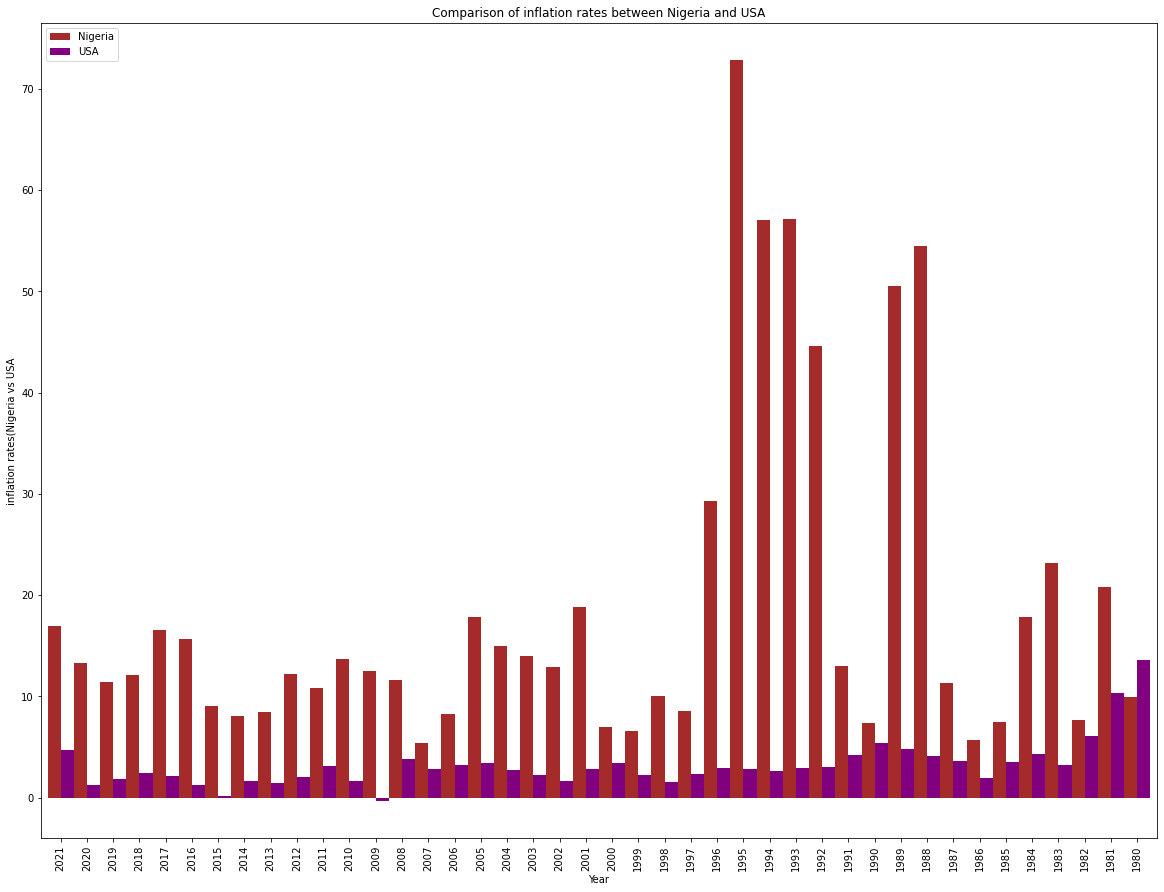

In [40]:
ax = inflation_df.plot.bar(x = 'Year', y=['Nigeria', 'USA'], figsize = (20,15),  width = 1.0, color=['brown', 'purple'])
plt.legend(loc = 'upper left')
plt.title("Comparison of inflation rates between Nigeria and USA")
plt.xlabel('Year')
plt.ylabel("inflation rates(Nigeria vs USA")

plt.show()

>Nigeria has higher inflation rates compared to USA which is really low

In [49]:

avg_df = inflation_df.groupby('Year')['Nigeria'].mean()
avg_year= avg_df.sort_values(ascending=False)
avg_inflation =avg_year
avg_inflation.head()

Year
1995    72.84
1993    57.17
1994    57.03
1988    54.51
1989    50.47
Name: Nigeria, dtype: float64

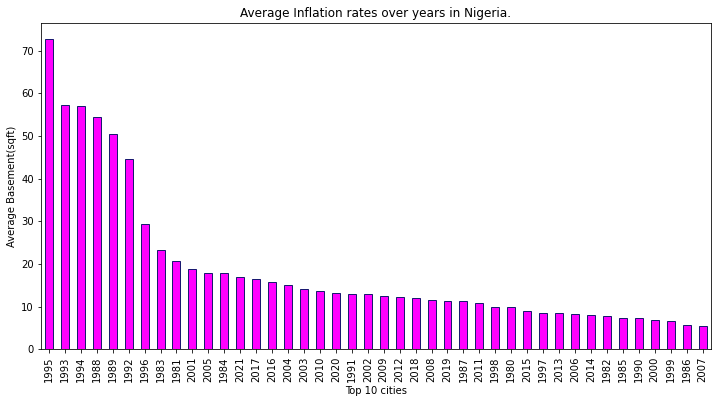

In [52]:
fig = plt.figure(figsize=(12,6))
avg_inflation.plot.bar(color='fuchsia',edgecolor ='midnightblue', width=0.5)
plt.title('Average Inflation rates over years in Nigeria.')
plt.xlabel('Top 10 cities')
plt.ylabel('Average Basement(sqft)')
plt.show()
     


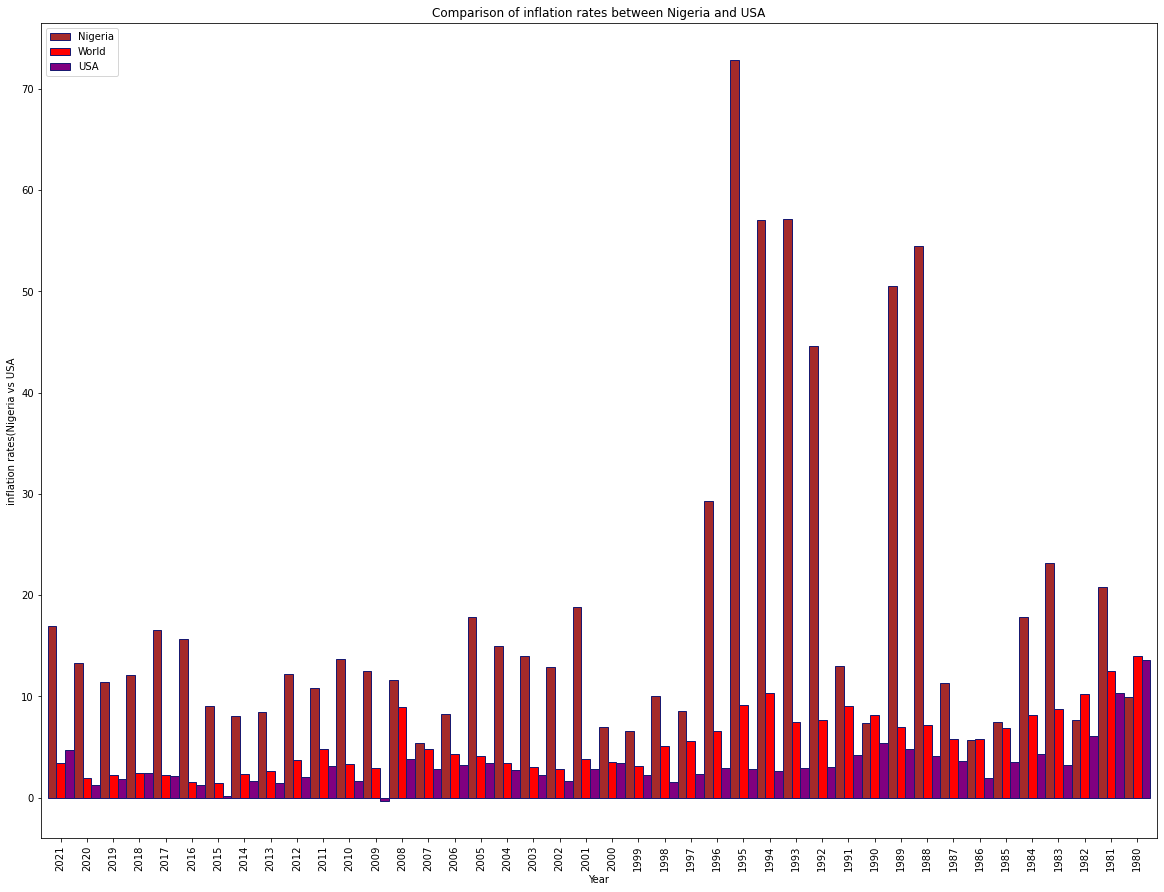

In [56]:
ax = inflation_df.plot.bar(x = 'Year', y=['Nigeria', 'World','USA'], figsize = (20,15),  width = 1.0, color=['brown', 'red','purple'] ,edgecolor ='midnightblue')
plt.legend(loc = 'upper left')
plt.title("Comparison of inflation rates between Nigeria and USA")
plt.xlabel('Year')
plt.ylabel("inflation rates(Nigeria vs USA")

plt.show()